In [1]:
! pip install scattertext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 4.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 8.8 MB/s eta 0:00:0000:0100:01m
  Using cached flashtext-2.7-py2.py3-none-any.whl
  Using cached gensim-4.2.0-cp39-cp39-macosx_10_9_x86_64.whl (24.0 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 7.7 MB/s eta 0:00:00
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3


In [7]:
from scattertext import (
    SampleCorpora,
    CorpusFromParsedDocuments,
    produce_scattertext_explorer,
    whitespace_nlp_with_sentences,
    AssociationCompactor,
    Scalers
)

df = SampleCorpora.ConventionData2012.get_data().assign(
    parse=lambda df: df.text.apply(
        whitespace_nlp_with_sentences
    )
)
corpus = CorpusFromParsedDocuments(
    df,
    category_col='party',
    parsed_col='parse'
).build().get_unigram_corpus().compact(
    AssociationCompactor(2000)
)

html = produce_scattertext_explorer(
    corpus,
    category='democrat',
    category_name='Democratic',
    not_category_name='Republican',
    minimum_term_frequency=0,
    pmi_threshold_coefficient=0,
    width_in_pixels=1000,
    metadata=corpus.get_df()['speaker'],
    transform=Scalers.dense_rank
)
open('./demo_compact.html', 'w').write(html)

1655959

In [8]:
! pip install wordcloud
! pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 1.5 MB/s eta 0:00:00a 0:00:01


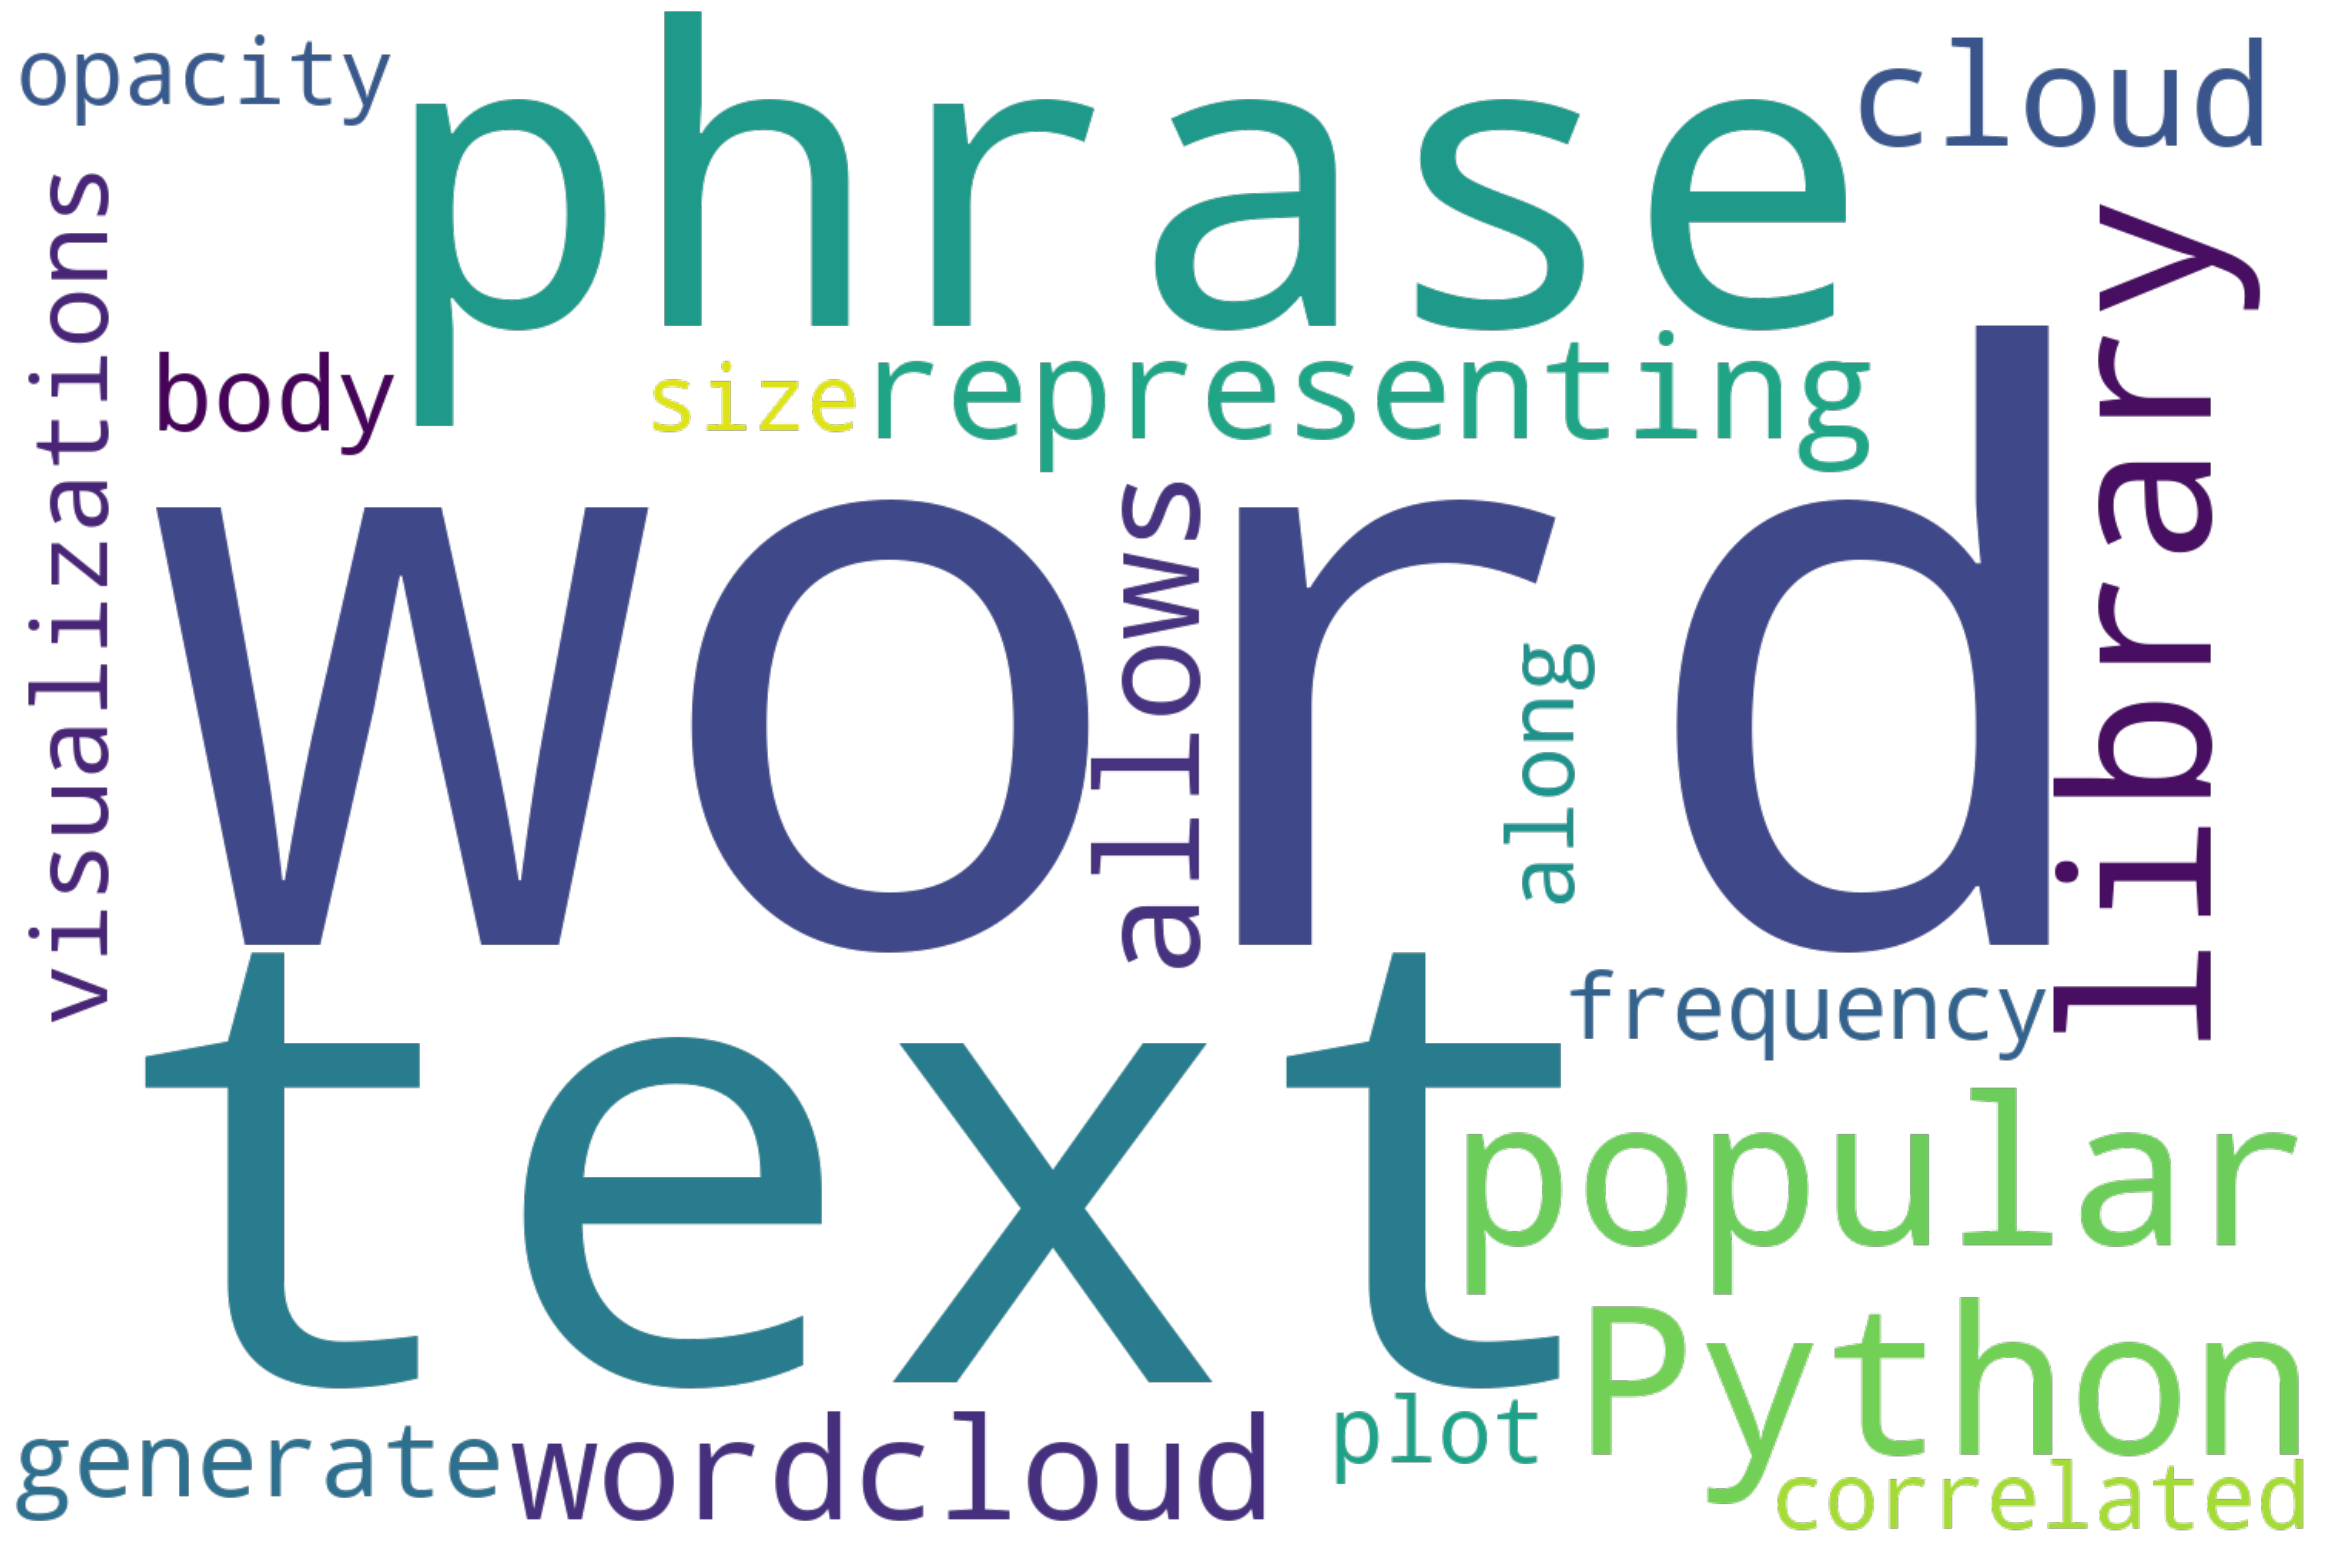

In [9]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

wc = WordCloud(
    mode = "RGBA",
    collocations = False,
    background_color = None,
    width=1500, height=1000
)

text = "The most popular library in Python for representing text is wordcloud. Word cloud allows you to generate visualizations on a body of text, where the frequency of words/phrases is correlated with the size of the word/phrase on the plot along with its opacity. "

word_cloud = wc.generate(text)
plt.figure(figsize=(30,20))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()